In [7]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [8]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
from time import sleep
import random

In [9]:
from math import exp
from math import factorial
from math import sqrt
import numpy as np
def f(xi,sigma,n):
    return np.sqrt((2*sigma)**n / factorial(n)) \
                          * (xi)**n \
                         *np.exp(-sigma*xi**2)
    
def kernel_data(data, sigma):
    kernelData = []
    N = len(data[0]) + 1
    print('升维后的维度',N)
    for x in data:
        e_data = []
        for n in range(N):
            e_data_i = 1
            for xi in x:
                e_data_i *= f(xi,sigma,n)
            e_data.append(e_data_i)
        kernelData.append(e_data)
    return kernelData

In [10]:
def prediction(test, alphas):
    x = np.mat(test)
#     x = np.concatenate((np.ones((test.shape[0], 1)), test), axis=1)
    result = []

    for i in x:
        if np.dot(i, alphas) > 0:
            result.append(1)
        else:
            result.append(-1)

    return result
def SVM(X_train, y_train, learning_rate=0.01, max_iter=10000):

    # 转化为numpy的mat存储
    data_x = np.mat(X_train)
#     data_x = np.concatenate((np.ones((data_matrix.shape[0], 1)), data_matrix), axis=1)
    label_mat = np.mat(y_train).transpose()
    m, n = np.shape(data_x)
    # 初始化alpha，设为0
    alphas = np.zeros((n, 1))

    alphas_history = [alphas]


    # 初始化迭代次数
    iter_num = 1
    alpha_pairs_changed = 0
    # 最多迭代max_iter次
    while iter_num <= max_iter:
#         for i in range(m):## 可以改成随机梯度下降
        i = np.random.randint(0,m)
        # 计算预测值
        y = float(np.dot(data_x[i], alphas))

        if 1-label_mat[i]*y >= 0:
            alphas = (1.0 - 1.0 / iter_num) * alphas + learning_rate * (label_mat[i] * data_x[i]).T
        else:
            alphas = (1.0 - 1.0 / iter_num) * alphas

        alphas_history.append(alphas)

        # 统计优化次数
        alpha_pairs_changed += 1
        # 打印统计信息
#         print("第%d次迭代 样本：%d , alpha优化次数：%d" % (iter_num, i, alpha_pairs_changed))

        iter_num += 1
    return alphas

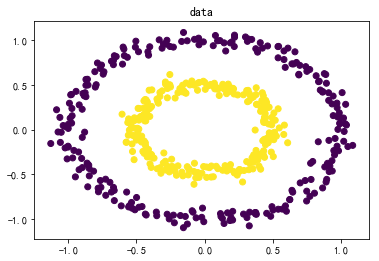

升维后的维度 3
升维后的维度 3


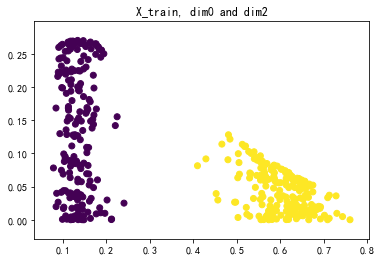

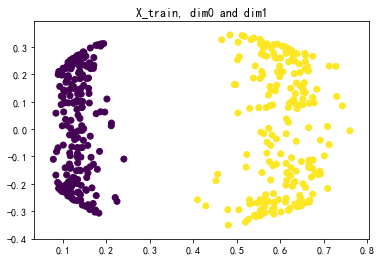

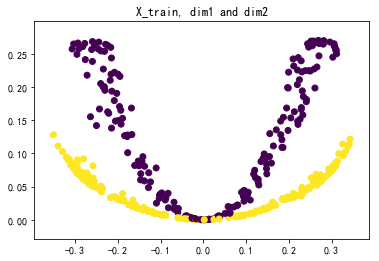

In [20]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
def genTwoCircles(n_samples=1000):
    X,y = datasets.make_circles(n_samples, factor=0.5, noise=0.05)
    return X, y
data, label = genTwoCircles(n_samples=500)
plt.scatter(data[:,0], data[:,1],c=label)
plt.title('data')
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=1)

sigma = 2
X_train_3 = kernel_data(X_train,sigma)
X_test_3 = kernel_data(X_test,sigma)
plt.scatter(np.array(X_train_3)[:,0], np.array(X_train_3)[:,2],c=y_train)
plt.title('X_train, dim0 and dim2')
plt.show()
plt.scatter(np.array(X_train_3)[:,0], np.array(X_train_3)[:,1],c=y_train)
plt.title('X_train, dim0 and dim1')
plt.show()
plt.scatter(np.array(X_train_3)[:,1], np.array(X_train_3)[:,2],c=y_train)
plt.title('X_train, dim1 and dim2')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
standardScaler = StandardScaler()
standardScaler.fit(X_train_3)
X_train_3 = standardScaler.transform(X_train_3)

standardScaler.fit(X_test_3)
X_test_3 = standardScaler.transform(X_test_3)

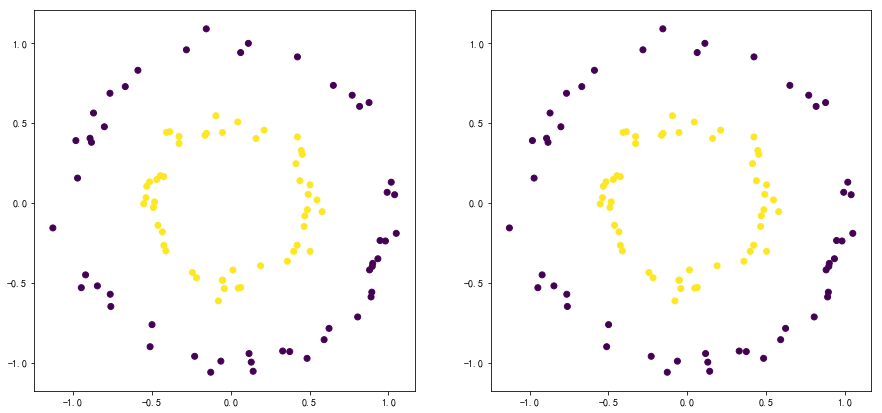

In [38]:
w = SVM(X_train_3,y_train,max_iter=1000)
fig,axes = plt.subplots(1,2,figsize=(15,7))
fig.subplots_adjust(hspace=0.3,wspace=0.2)

axes[0].scatter(X_test[:,0], X_test[:,1],c=y_pre)

axes[1].scatter(X_test[:,0], X_test[:,1],c=y_test)

In [36]:
y_test[y_test==0] = -1

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pre,y_test))

1.0
